# Getting Started
https://scikit-learn.org/stable/getting_started.html

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import sklearn
print(sklearn.__version__)

0.24.2


In [3]:
# 필요 패키지 import
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

# 실습용 데이터 - size_korea
https://sizekorea.kr/page/report/1

In [4]:
size_korea = pd.read_csv('../data/size_korea_small.csv')

In [5]:
size_korea.head()

,키,몸무게,체지방율,성별
0,1736.0,72.1,18.9,남
1,1833.0,106.2,27.0,남
2,1744.0,69.1,8.1,남
3,1751.0,68.4,10.3,남
4,1851.0,81.9,14.1,남


<AxesSubplot:xlabel='몸무게', ylabel='키'>

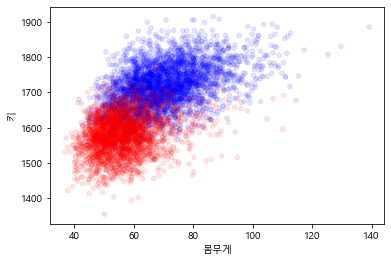

In [6]:
size_korea.replace({'남':'blue','여':'red'}).plot.scatter('몸무게','키',c='성별', alpha=0.1)

### 성별: 키 몸무게 평균값

In [7]:
size_korea.groupby('성별')[['키','몸무게']].mean()

,키,몸무게
성별,,
남,1722.415307,70.952886
여,1587.070650,56.806660


### 평균값만을 가지고  예측해 보기

In [8]:
X = size_korea.groupby('성별')[['키','몸무게']].mean().values
y = [0, 1]  # classes of each sample

In [9]:
X

array([[1722.4153074 ,   70.95288582],
       [1587.07065048,   56.80666044]])

#### RandomForestClassifier

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)

### 학습

In [11]:
clf.fit(X,y)

RandomForestClassifier(random_state=0)

### 예측 
- 내 키와 몸무게를 넣어 봅시다

In [12]:
clf.predict([[170, 75]])

array([1])

### 원래 데이터에서는 얼마나 맞췄을까?

In [13]:
clf.predict(size_korea[['키','몸무게']].values)

array([0, 0, 0, ..., 1, 1, 1])

In [14]:
(clf.predict(size_korea[['키','몸무게']].values) == size_korea.성별.replace({'남':0,'여':1})).mean()

0.8772066864552414

In [15]:
clf.score(size_korea[['키','몸무게']].values, size_korea.성별.replace({'남':0,'여':1}))

0.8772066864552414

In [16]:
# 정확도 계산
from sklearn.metrics import accuracy_score
accuracy_score(size_korea.성별.replace({'남':0,'여':1}), clf.predict(size_korea[['키','몸무게']].values))

0.8772066864552414

### 다른 모델들에도 적용해 보면 ...

#### LogisticRegression

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [18]:
clf.fit(X,y)

LogisticRegression()

In [19]:
(clf.predict(size_korea[['키','몸무게']].values) == size_korea.성별.replace({'남':0,'여':1})).mean()

0.6917669114200906

#### GaussianNB

In [20]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [21]:
clf.fit(X,y)

GaussianNB()

In [22]:
(clf.predict(size_korea[['키','몸무게']].values) == size_korea.성별.replace({'남':0,'여':1})).mean()

0.8795500703015154

#### SVC

In [23]:
from sklearn.svm import SVC
clf = SVC()

In [24]:
clf.fit(X,y)

SVC()

In [25]:
(clf.predict(size_korea[['키','몸무게']].values) == size_korea.성별.replace({'남':0,'여':1})).mean()

0.8795500703015154

#### KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)

In [27]:
clf.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [28]:
(clf.predict(size_korea[['키','몸무게']].values) == size_korea.성별.replace({'남':0,'여':1})).mean()

0.8795500703015154

### 전체 데이터를 이용하면 ...

In [29]:
X = size_korea[['키','몸무게']].values
y = size_korea.성별.replace({'남':0,'여':1})

#### RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X,y)
(clf.predict(size_korea[['키','몸무게']].values) == size_korea.성별.replace({'남':0,'여':1})).mean()

0.9923449461021715

### 다른 모델들에도 적용해 보면 ...

#### LogisticRegression

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X,y)
(clf.predict(size_korea[['키','몸무게']].values) == size_korea.성별.replace({'남':0,'여':1})).mean()

0.8864239962505859

#### GaussianNB

In [32]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X,y)
(clf.predict(size_korea[['키','몸무게']].values) == size_korea.성별.replace({'남':0,'여':1})).mean()

0.884393063583815

#### SVC

In [33]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X,y)
(clf.predict(size_korea[['키','몸무게']].values) == size_korea.성별.replace({'남':0,'여':1})).mean()

0.8826745820965474

#### KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X,y)
(clf.predict(size_korea[['키','몸무게']].values) == size_korea.성별.replace({'남':0,'여':1})).mean()

0.9181377909701609

### 같이 비교해 보기

In [35]:
clfs = []
clfs.append(RandomForestClassifier(random_state=0))
clfs.append(LogisticRegression())
clfs.append(GaussianNB())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))

In [36]:
sk_data = {}
sk_data['mean'] = {'X': size_korea.groupby('성별')[['키','몸무게']].mean().values, 'y': [0,1]}
sk_data['all'] = {'X': size_korea[['키','몸무게']].values, 'y': size_korea.성별.replace({'남':0,'여':1})}

In [37]:
result = {}
for data_type in ['mean', 'all']:
    X = sk_data[data_type]['X']
    y = sk_data[data_type]['y']
    for clf in clfs:
        try:
            clf.fit(X,y)
            result[data_type, clf.__class__.__name__] = (clf.predict(size_korea[['키','몸무게']].values) 
                                                         == size_korea.성별.replace({'남':0,'여':1})).mean()
        except Exception as e:
            print(e)

Expected n_neighbors <= n_samples,  but n_samples = 2, n_neighbors = 3


In [38]:
pd.Series(result).unstack().T

,all,mean
GaussianNB,0.884393,0.879550
KNeighborsClassifier,0.918138,NaN
LogisticRegression,0.886424,0.691767
RandomForestClassifier,0.992345,0.877207
SVC,0.882675,0.879550


# 메모리에 저장한 후 그 결과를 보여주는 것은 아닌가?

In [39]:
X = size_korea[['키','몸무게','체지방율']].values
y = size_korea.성별.replace({'남':0,'여':1})

In [40]:
X[:5], y[:5]

(array([[1736. ,   72.1,   18.9],
        [1833. ,  106.2,   27. ],
        [1744. ,   69.1,    8.1],
        [1751. ,   68.4,   10.3],
        [1851. ,   81.9,   14.1]]),
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: 성별, dtype: int64)

#### 짝수번째 데이터만 추출

In [41]:
X_train = X[::2]
y_train = y[::2]

In [42]:
X_train.shape, y_train.shape

((3201, 3), (3201,))

In [43]:
y_train.value_counts()

1    1604
0    1597
Name: 성별, dtype: int64

In [44]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### 홀수번째 데이터만 추출

In [45]:
X_test = X[1::2]
y_test = y[1::2]

In [46]:
X_test.shape, y_test.shape

((3200, 3), (3200,))

In [47]:
clf.predict(X_test) 
y_test.values

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [48]:
(clf.predict(X_test) == y_test).count()

3200

In [49]:
(clf.predict(X_test) == y_test).mean()

0.96125

#### 어떤 항목들이 맞지 않나?

In [50]:
(clf.predict(X_test) == y_test).loc[lambda x: x==False]

61      False
67      False
73      False
211     False
227     False
        ...  
5981    False
6019    False
6319    False
6361    False
6379    False
Name: 성별, Length: 124, dtype: bool

## train_test_split 활용

In [51]:
X = size_korea[['키','몸무게','체지방율']].values
y = size_korea.성별.replace({'남':0,'여':1})

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [53]:
clf.fit(X_train, y_train)
clf.predict(X_test) == y_test.values
(clf.predict(X_test) == y_test.values).mean()

0.9633099141295862

# 데이터 변환
### Transformers and pre-processors

- 표준화 n(0,1)

In [54]:
X = size_korea.groupby('성별')[['키','몸무게','체지방율']].mean().values
print(X)

[[1722.4153074    70.95288582   19.11718946]
 [1587.07065048   56.80666044   30.4881108 ]]


In [55]:
from sklearn.preprocessing import StandardScaler
# scale data according to computed scaling values
StandardScaler().fit(X).transform(X)

array([[ 1.,  1., -1.],
       [-1., -1.,  1.]])

In [56]:
size_korea[['키','몸무게','체지방율']].head()

,키,몸무게,체지방율
0,1736.0,72.1,18.9
1,1833.0,106.2,27.0
2,1744.0,69.1,8.1
3,1751.0,68.4,10.3
4,1851.0,81.9,14.1


## 왜 데이터 변환이나 표준화를 하는가?

### data transform 없이

In [57]:
X = size_korea[['키','몸무게','체지방율']].values
y = size_korea.성별.replace({'남':0,'여':1})

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [59]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [60]:
clf.predict(X_test)
(clf.predict(X_test) == y_test).mean()

0.9633099141295862

### data transform 이후 fit

In [61]:
from sklearn.preprocessing import StandardScaler
X_train_std = StandardScaler().fit(X_train).transform(X_train)

<AxesSubplot:ylabel='Frequency'>

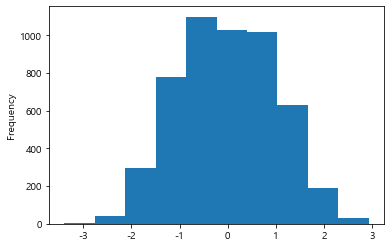

In [62]:
pd.Series(X_train_std[:,0]).plot.hist()

<AxesSubplot:ylabel='Frequency'>

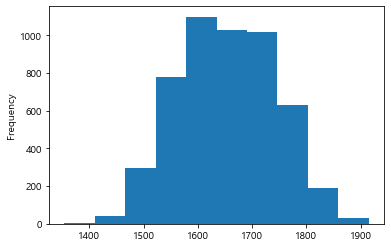

In [63]:
pd.Series(X_train[:,0]).plot.hist()

In [64]:
clf.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

In [65]:
X_test_std = StandardScaler().fit(X_train).transform(X_test)

In [66]:
clf.predict(X_test_std)
(clf.predict(X_test_std) == y_test).mean()

0.9648711943793911

## 데이터 변환과 fitting을 한번에 하는 방법은 없나?

### Pipelines: chaining pre-processors and estimators
<font color='blue'> Transformers and estimators (predictors) can be combined together into a single unifying object: a Pipeline.

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# X, y 정의
X = size_korea[['키','몸무게','체지방율']].values
y = size_korea.성별.replace({'남':0,'여':1})

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

print(pd.Series(y).value_counts(normalize=True))
print(pd.Series(y_train).value_counts(normalize=True))
print(pd.Series(y_test).value_counts(normalize=True))

1    0.501953
0    0.498047
Name: 성별, dtype: float64
1    0.503958
0    0.496042
Name: 성별, dtype: float64
0    0.50406
1    0.49594
Name: 성별, dtype: float64


### 층화추출: stratify option

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

print(pd.Series(y).value_counts(normalize=True))
print(pd.Series(y_train).value_counts(normalize=True))
print(pd.Series(y_test).value_counts(normalize=True))

1    0.501953
0    0.498047
Name: 성별, dtype: float64
1    0.501875
0    0.498125
Name: 성별, dtype: float64
1    0.502186
0    0.497814
Name: 성별, dtype: float64


### make_pipeline 활용

In [70]:
from sklearn.pipeline import make_pipeline
# create a pipeline object
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

# fit the whole pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [71]:
pipe.predict(X_test)
y_test

3406    0
6222    1
194     1
756     0
5531    1
       ..
3504    0
4449    0
4528    0
2442    0
4049    0
Name: 성별, Length: 1601, dtype: int64

### 얼마나 맞았나?

In [72]:
(pipe.predict(X_test) == y_test).mean()

0.9537788881948782

### accuracy_score 활용

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(pipe.predict(X_test), y_test)

0.9537788881948782

### model.score 활용

In [74]:
pipe.score(X_test, y_test)

0.9537788881948782

## 운 좋게 맞은 것은 아닌가?

### Cross validation

In [75]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)

In [76]:
X = size_korea[['키','몸무게','체지방율']].values
y = size_korea.성별.replace({'남':0,'여':1})

In [77]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=11)

In [78]:
list(kf.split(X))

[(array([   0,    2,    3, ..., 6396, 6399, 6400]),
  array([   1,    5,   11, ..., 6387, 6397, 6398])),
 (array([   0,    1,    2, ..., 6397, 6398, 6400]),
  array([  12,   18,   21, ..., 6381, 6389, 6399])),
 (array([   0,    1,    2, ..., 6398, 6399, 6400]),
  array([   3,    6,    8, ..., 6393, 6395, 6396])),
 (array([   0,    1,    3, ..., 6398, 6399, 6400]),
  array([   2,   13,   20, ..., 6390, 6391, 6392])),
 (array([   1,    2,    3, ..., 6397, 6398, 6399]),
  array([   0,    4,    7, ..., 6386, 6394, 6400]))]

In [79]:
idx = list(kf.split(X))
idx[0][0].shape, idx[0][1].shape

((5120,), (1281,))

In [80]:
len(set(idx[0][0]) | set(idx[0][1]))

6401

### MECE

In [81]:
len(set(idx[0][1]) | set(idx[1][1]) | set(idx[2][1]) | set(idx[3][1]) | set(idx[4][1]))

6401

#### kfold index들을 이용해서 결과 --> 평균

In [82]:
accuracy_list = []
for train_index, test_index in kf.split(X):
    X_train, y_train = X[train_index], y[train_index]
    X_test,  y_test  = X[test_index],  y[test_index]    
    y_predict = clf.fit(X_train, y_train).predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_predict))
    
print(accuracy_list)
print(np.array(accuracy_list).mean())

[0.9633099141295862, 0.9671875, 0.95859375, 0.95859375, 0.965625]
0.9626619828259171


#### cross_validate

In [83]:
from sklearn.model_selection import cross_validate
result = cross_validate(clf, X, y, cv=kf)  # defaults to 5-fold CV
result

{'fit_time': array([1.04322648, 1.04491305, 1.03525901, 0.99767184, 0.98934841]),
 'score_time': array([0.05774903, 0.06580758, 0.04149842, 0.06094098, 0.06660724]),
 'test_score': array([0.96330991, 0.9671875 , 0.95859375, 0.95859375, 0.965625  ])}

In [84]:
result['test_score'].mean()

0.9626619828259171

# 좋은 결과를 내는 모델 튜닝
### Automatic parameter searches

### RandomizedSearchCV

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [86]:
X = size_korea[['키','몸무게','체지방율']].values
y = size_korea.성별.replace({'남':0,'여':1})

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [87]:
RandomForestClassifier(random_state=0).get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [88]:
# define the parameter space that will be randomizeded over
param_distributions = {'max_depth': randint(5, 10)}

# now create a randomizedCV object and fit it to the data
randomized = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0),
                            n_iter=5,
                            param_distributions=param_distributions,
                            random_state=0, verbose=2)
randomized.fit(X_train, y_train)

randomized.best_params_

# the randomized object now acts like a normal random forest estimator
# with max_depth=9 and n_estimators=4
randomized.score(X_test, y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ........................................max_depth=9; total time=   0.8s
[CV] END ........................................max_depth=9; total time=   0.8s
[CV] END ........................................max_depth=9; total time=   0.8s
[CV] END ........................................max_depth=9; total time=   0.8s
[CV] END ........................................max_depth=9; total time=   0.9s
[CV] END ........................................max_depth=5; total time=   0.6s
[CV] END ........................................max_depth=5; total time=   0.6s
[CV] END ........................................max_depth=5; total time=   0.6s
[CV] END ........................................max_depth=5; total time=   0.6s
[CV] END ........................................max_depth=5; total time=   0.6s
[CV] END ........................................max_depth=8; total time=   0.8s
[CV] END ........................................

0.9643972517176764

In [89]:
randomized.predict(X_test)

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

### GridSearchCV

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [91]:
hyperparameters = {'n_neighbors': [1, 2, 3, 11, 17],
                   'weights': ['uniform', 'distance'],
                   'leaf_size': [4, 6, 8, 10]}


In [92]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn, param_grid = hyperparameters,
                           cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'leaf_size': [4, 6, 8, 10],
                         'n_neighbors': [1, 2, 3, 11, 17],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [93]:
print(grid.best_estimator_.get_params())
print(f'optimal train score: {grid.best_score_:.3f}')
print(f'test score: {grid.score(X_test, y_test):.3f}')
print(f'optimal parameter: {grid.best_params_}')
print(grid.cv_results_)

{'algorithm': 'auto', 'leaf_size': 4, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
optimal train score: 0.960
test score: 0.964
optimal parameter: {'leaf_size': 4, 'n_neighbors': 3, 'weights': 'uniform'}
{'mean_fit_time': array([0.01348696, 0.01409655, 0.01374249, 0.01293592, 0.01561203,
       0.01280661, 0.01310496, 0.01444745, 0.0131619 , 0.01137433,
       0.01338525, 0.01414475, 0.01504083, 0.01219964, 0.01407762,
       0.01191216, 0.01133919, 0.0124042 , 0.01280227, 0.01444235,
       0.01195507, 0.01079011, 0.01278644, 0.01193871, 0.01083179,
       0.01083784, 0.01120176, 0.01242375, 0.01224656, 0.01212802,
       0.01188974, 0.01233621, 0.01216798, 0.01189861, 0.01246867,
       0.01204872, 0.01196327, 0.0121253 , 0.01221166, 0.01229758]), 'std_fit_time': array([0.00267374, 0.00207761, 0.001377  , 0.00141543, 0.00309978,
       0.00218967, 0.00178592, 0.00021973, 0.00271612, 0.00149698,
       0.00129275, 0.0007

# 모델로 예측하기 위해 매번 학습시켜야 하나?

In [94]:
from joblib import dump, load
dump(randomized, '../working/randomized.joblib')

['../working/randomized.joblib']

In [95]:
!dir ..\working

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 72F1-9AEA

 d:\2021_데이터솔루션\working 디렉터리

2021-03-30 화  오후 08:06    <DIR>          .
2021-03-30 화  오후 08:06    <DIR>          ..
2021-03-30 화  오후 08:11             9,743 인체.xlsx
2021-03-30 화  오후 08:11            14,894 인체_choice.xlsx
2021-08-10 화  오후 10:29             9,468 Feature_importance.png
2021-08-20 금  오후 07:12           300,690 submission.csv
2021-08-22 일  오전 11:05         1,818,124 randomized.joblib
               5개 파일           2,152,919 바이트
               2개 디렉터리  93,063,217,152 바이트 남음


In [96]:
model = load('../working/randomized.joblib')
model.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 0,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(random_state=0),
 'n_iter': 5,
 'n_jobs': None,
 'param_distributions': {'max_depth': <scipy.stats._distn_infrastructure.rv_frozen at 0x22a57b2d610>},
 'pre_dispatch': '2*n_jobs',
 'random_state': 0,
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 2}

In [97]:
X_test

array([[1591. ,   62.2,   38.6],
       [1667. ,   67.5,   21.8],
       [1495. ,   43. ,   25.9],
       ...,
       [1737. ,   71.8,   23.4],
       [1699. ,   62.1,   13.4],
       [1801. ,   91.6,   26.8]])

In [98]:
model.predict(X_test)

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [99]:
model.best_estimator_

RandomForestClassifier(max_depth=8, random_state=0)

# End

## 실습: pipeline

In [100]:
data = pd.read_csv('../data/size_korea_w_null.csv')
# 데이터 정제 및 변환
X = data.drop('성별', axis=1).replace({'표준': -1, '표준이하': 0, '표준이상': 1})
X = X.fillna(X.mean())
y = data['성별'].replace({'남':0,'여':1})

In [101]:
dict(zip(X.기초대사량평가.value_counts().index,[-1,0,1]))

{-1.0: -1, 0.0: 0, 1.0: 1}

In [102]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
rfe_selector = RFE(estimator=lr, n_features_to_select=5, step=20)

In [103]:
X

,키,몸무게,목둘레,허리둘레,BMI,체지방율,기초대사량,기초대사량평가,머리수직길이,머리두께,머리너비,발너비,발직선길이,나이
0,1736.0,72.1,385.0,819.0,23.924112,18.9,1633.0,-1.0,224.0,188.0,159.0,88.0,228.0,25
1,1833.0,106.2,418.0,1036.0,31.608187,27.0,2044.0,0.0,247.0,201.0,161.0,98.0,269.0,28
2,1744.0,69.1,400.0,754.0,22.718784,8.1,1742.0,-1.0,251.0,201.0,162.0,90.0,244.0,19
3,1751.0,68.4,355.0,720.0,22.309190,10.3,1695.0,-1.0,234.0,199.0,154.0,88.0,231.0,20
4,1851.0,81.9,394.0,846.0,23.904027,14.1,1890.0,-1.0,223.0,195.0,158.0,86.0,265.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,1706.0,59.6,340.0,699.0,20.478031,30.9,1259.0,0.0,222.0,175.0,161.0,89.0,242.0,20
6416,1624.0,54.9,321.0,765.0,20.816145,27.7,1228.0,-1.0,243.0,179.0,151.0,93.0,241.0,20
6417,1508.0,50.1,325.0,782.0,22.031042,30.7,1120.0,-1.0,214.0,170.0,142.0,95.0,228.0,44
6418,1574.0,44.6,305.0,630.0,18.002193,25.4,1089.0,-1.0,221.0,173.0,157.0,90.0,222.0,20


In [104]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6415    1
6416    1
6417    1
6418    1
6419    1
Name: 성별, Length: 6420, dtype: int64

In [105]:
rfe_selector.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RFE(estimator=LogisticRegression(), n_features_to_select=5, step=20)

In [106]:
rfe_selector.get_support()

array([False,  True,  True, False,  True,  True, False, False, False,
       False, False,  True, False, False])

In [107]:
X.columns[rfe_selector.get_support()]

Index(['몸무게', '목둘레', 'BMI', '체지방율', '발너비'], dtype='object')

In [108]:
rfe_selector = RFE(estimator=lr, n_features_to_select=5, step=20)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.columns[rfe_support].tolist()
print(rfe_feature)
print(rfe_support)

['몸무게', '목둘레', 'BMI', '체지방율', '발너비']
[False  True  True False  True  True False False False False False  True
 False False]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
from sklearn.pipeline import Pipeline
clf = Pipeline(steps=[('feature_selector', rfe_selector),
                      ('classifier', lr)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [110]:
clf.fit(X_train, y_train)
print(f"model score: {clf.score(X_test, y_test):.3f}" )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model score: 0.977


In [111]:
from joblib import dump, load
dump(clf, '../working/clf.joblib')

['../working/clf.joblib']

## 실습: Dataset loading utilities to practise
https://scikit-learn.org/stable/datasets.html#datasets

In [112]:
from sklearn.datasets import load_iris
data =load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [113]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [114]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [115]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [116]:
data.data # data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [117]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [118]:
pd.DataFrame(data.data, columns = data.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [119]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [120]:
df[::2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
4,5.0,3.6,1.4,0.2,0
6,4.6,3.4,1.4,0.3,0
8,4.4,2.9,1.4,0.2,0
...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,2
142,5.8,2.7,5.1,1.9,2
144,6.7,3.3,5.7,2.5,2
146,6.3,2.5,5.0,1.9,2


In [121]:
X_train = df.drop('target', axis=1)[::2]
y_train = df.target[::2]
X_train.shape, y_train.shape
y_train.value_counts()

0    25
1    25
2    25
Name: target, dtype: int64

In [122]:
clf.fit(X_train, y_train)

Pipeline(steps=[('feature_selector',
                 RFE(estimator=LogisticRegression(), n_features_to_select=5,
                     step=20)),
                ('classifier', LogisticRegression())])

In [123]:
X_test = df.drop('target', axis=1)[1::2]
y_test = df.target[1::2]
clf.predict(X_test) 
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [124]:
(clf.predict(X_test) == y_train).count()
(clf.predict(X_test) == y_train).mean()

0.96

In [125]:
(clf.predict(X_test) == y_train).loc[lambda x: x==False]

82     False
118    False
132    False
Name: target, dtype: bool

### train_test_split 활용

In [126]:
X = df.drop('target', axis=1)
y = df.target

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [128]:
clf.fit(X_train, y_train)
clf.predict(X_test) == y_test.values
(clf.predict(X_test) == y_test.values).mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

1.0

## 실습: iris

In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# load the iris dataset and split it into train and test sets
X, y = load_iris(return_X_y=True)

#### train_test_split 연습

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

pd.Series(y_train).value_counts(normalize=True)
pd.Series(y_test).value_counts(normalize=True)

1    0.421053
0    0.342105
2    0.236842
dtype: float64

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
pd.Series(y_train).value_counts(normalize=True)
pd.Series(y_test).value_counts(normalize=True)

0    0.342105
1    0.342105
2    0.315789
dtype: float64

#### pipeline 연습 
- make_pipeline과 Pipeline은 동일한 역할
- 사용하는 형식이 다름 --> Pipeline은 해당 단계의 이름을 부여

In [132]:
from sklearn.pipeline import make_pipeline
# create a pipeline object
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

# fit the whole pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [133]:
pipe.predict(X_test)
y_test

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1,
       1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2])

In [134]:
# we can now use it like any other estimator
from sklearn.metrics import accuracy_score
accuracy_score(pipe.predict(X_test), y_test)

0.9736842105263158

## 실습: cross-validation

In [135]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)

In [136]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df.head()

X = df.drop('target', axis=1)
y = df.target

In [137]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=11)

accuracy_list = []
for train_index, test_index in kf.split(X):
    train_index[0:10], test_index[0:10]
    X_train = X.loc[train_index]; y_train = y.loc[train_index]
    X_test = X.loc[test_index]; y_test = y.loc[test_index]    
    y_predict = model.fit(X_train, y_train).predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_predict))
    
accuracy_list
sum(accuracy_list)/len(accuracy_list)

0.9533333333333334

In [138]:
result = cross_validate(model, X, y, cv=kf)  # defaults to 5-fold CV
result

{'fit_time': array([0.34662986, 0.32533121, 0.32334852, 0.32440472, 0.30594993]),
 'score_time': array([0.02840853, 0.0286355 , 0.02474475, 0.02772927, 0.02455354]),
 'test_score': array([0.93333333, 0.9       , 0.96666667, 1.        , 0.96666667])}

In [139]:
result['test_score'] # 이건 안됨, result.'test_score'
np.mean(result['test_score'] )

0.9533333333333334

## Regression

### 실습 size_korea

In [140]:
X = size_korea[['키','몸무게']].values
y = size_korea.체지방율
X.shape, y.shape

((6401, 2), (6401,))

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

lr = LinearRegression()
result = cross_validate(lr, X, y)  
result['test_score']

array([0.59514149, 0.54009813, 0.4276149 , 0.42368942, 0.01218939])

### 실습 make_regression

In [142]:
# https://scikit-learn.org/stable/datasets/sample_generators.html
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, random_state=0)
X.shape
y.shape

(1000,)

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

lr = LinearRegression()
result = cross_validate(lr, X, y)  # defaults to 5-fold CV
result['test_score']  # r_squared score is high because dataset is easy

array([1., 1., 1., 1., 1.])

### 실습 california_housing

In [144]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint

https://scikit-learn.org/stable/datasets/real_world.html

In [145]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [146]:
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [147]:
# define the parameter space that will be searched over
param_distributions = {'n_estimators': randint(1, 5),
                       'max_depth': randint(5, 10)}

# now create a searchCV object and fit it to the data
search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                            n_iter=5,
                            param_distributions=param_distributions,
                            random_state=0)
search.fit(X_train, y_train)

search.best_params_

# the search object now acts like a normal random forest estimator
# with max_depth=9 and n_estimators=4
search.score(X_test, y_test)

0.735363411343253

In [148]:
search.predict(X_test)

array([1.68495047, 2.64131467, 1.62184929, ..., 1.99436275, 2.31629552,
       2.44966756])

# End